In [36]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
from geopy.distance import great_circle
from geopy.geocoders import Nominatim

In [2]:
df=pd.read_csv('sendy_logistics.csv')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [3]:
df['Temp_diff']=df['Temperature']-22
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Temp_diff
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,-1.6
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,4.4
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,NaN
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,-2.8
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,-6.6


In [4]:
df['Fehr_Temp']=(1.8*df['Temperature']+32)
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Temp_diff,Fehr_Temp
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,-1.6,68.72
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,4.4,79.52
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,NaN,NaN
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,-2.8,66.56
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,-6.6,59.72


In [5]:
df=pd.read_csv('ufo.csv')
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [6]:
type(df['Time'][0])

str

In [7]:
df['Time']=pd.to_datetime(df['Time'],format='%m/%d/%Y %H:%M')

In [8]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [9]:
df['Month_name']=df['Time'].dt.month_name()
df.head()

,City,Colors Reported,Shape Reported,State,Time,Month_name
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,June
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,June
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,February
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,June
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,April


In [10]:
def month(x):
    if x =='December':
        return 1
    else:
        return 0

In [11]:
df['IN_December']=df['Month_name'].apply(month)
df.head()

,City,Colors Reported,Shape Reported,State,Time,Month_name,IN_December
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,June,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,June,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,February,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,June,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,April,0


In [12]:
df['Time_Diff_From_WW1']=(datetime(1914,6,28)-df['Time'])/np.timedelta64(1,'Y')
df.head()

,City,Colors Reported,Shape Reported,State,Time,Month_name,IN_December,Time_Diff_From_WW1
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,June,0,-15.928915
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,June,0,-16.008086
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,February,0,-16.637120
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,June,0,-16.927224
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,April,0,-18.808851


In [13]:
df=pd.read_csv('titanic_full.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df['Title']=df['Name'].apply(lambda x:x.split(',')[1])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry


<AxesSubplot:xlabel='Title', ylabel='count'>

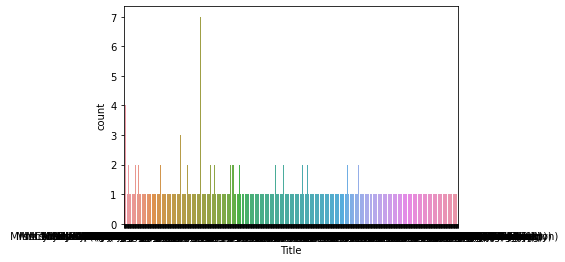

In [15]:
sns.countplot(data=df,x='Title')

In [16]:
df=pd.read_csv('sendy_logistics.csv')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [17]:
df['User Id'][1].split('User_Id_')[1]

'2285'

In [18]:
df['ID']=df['User Id'].apply(lambda x:x.split('User_Id_')[1])

In [19]:
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,ID
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,633
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2285
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,265
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,1402
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1737


In [20]:
df=pd.read_csv('visitor-interests.csv')
df.head()

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company


In [21]:
def extract(x):
    return user_agents.parse(x).browser


In [22]:
df['browser']=df['UserAgent'].apply(extract)
df.head()

,IP,UserAgent,Country,Languages,Interests,browser
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,"(Chrome, (53, 0, 2785), 53.0.2785)"
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,"(Chrome, (52, 0, 2743), 52.0.2743)"
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,"(Chrome, (52, 0, 2743), 52.0.2743)"
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,"(Chrome, (52, 0, 2743), 52.0.2743)"
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,"(Mobile Safari, (9, 0), 9.0)"


In [23]:
def extract_os(x):
    return user_agents.parse(x).os.family

In [24]:
df['os']=df['UserAgent'].apply(extract_os)
df.head()

,IP,UserAgent,Country,Languages,Interests,browser,os
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,"(Chrome, (53, 0, 2785), 53.0.2785)",Windows
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,"(Chrome, (52, 0, 2743), 52.0.2743)",Windows
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,"(Chrome, (52, 0, 2743), 52.0.2743)",Windows
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,"(Chrome, (52, 0, 2743), 52.0.2743)",Android
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,"(Mobile Safari, (9, 0), 9.0)",iOS


In [41]:
def extract_device(x):
    return user_agents.parse(x).device.family

In [42]:
df['device']=df['UserAgent'].apply(extract_device)
df.head()

,IP,UserAgent,Country,Languages,Interests,browser,os,device
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,"(Chrome, (53, 0, 2785), 53.0.2785)",Windows,Other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,"(Chrome, (52, 0, 2743), 52.0.2743)",Windows,Other
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,"(Chrome, (52, 0, 2743), 52.0.2743)",Windows,Other
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,"(Chrome, (52, 0, 2743), 52.0.2743)",Android,Nexus 9
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,"(Mobile Safari, (9, 0), 9.0)",iOS,iPad


In [43]:
df['latitude']=df['IP'].apply(lambda x:ip2geo.get(x,api_key='free').latitude)
df['longitude']=df['IP'].apply(lambda x:ip2geo.get(x,api_key='free').longitude)
df.head()

InvalidRequestError: 

In [ ]:
def extract(x):
     return great_circle((x['latitude'],x['longitude']),(30.033333,31.233334)).kilometers


In [ ]:
df['Dist_From_Egypt']=df.apply(extract,axis=1)
df.head()